In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv(r'C:\Users\User\Desktop\j\lessons\lesson_3\3_user_data.csv', encoding = 'cp1251')
df2 = pd.read_csv(r'C:\Users\User\Desktop\j\lessons\lesson_3\3_logs.csv', encoding = 'cp1251')

In [3]:
"""client - user identifier
premium - whether the client is premium
age - age"""

'client - user identifier\npremium - whether the client is premium\nage - age'

In [4]:
df1.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [5]:
"""client - user identifier
success - outcome (success - 1, failure - 0)
platform - platform
time - time in Unix format"""

'client - user identifier\nsuccess - outcome (success - 1, failure - 0)\nplatform - platform\ntime - time in Unix format'

In [6]:
df2.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [7]:
df1.shape

(2954, 3)

In [8]:
df2.shape

(4500, 4)

In [9]:
df1.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [10]:
df2.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [11]:
# How many unique values does the variable "platform" take?
df2['platform'].nunique()

3

In [12]:
# Which client has made the most successful transactions?
success_number = df2 \
    .query('success == True') \
    .groupby('client', as_index = False) \
    .agg({'platform':'count'}) \
    .rename(columns = {'platform':'success_number'}) \
    .sort_values('success_number', ascending = False) 

In [13]:
maximum_success = success_number.success_number.max()
success_df = success_number.query('success_number == @maximum_success')
', '.join([str(number) for number in success_df.client])

'12179, 61468, 52870, 61473, 92584, 82563, 78349, 36165, 28719'

In [14]:
# From which platform are the most successful transactions made?
platform = df2 \
    .query('success == True') \
    .groupby('platform', as_index = False) \
    .agg({'client':'count'}) \
    .rename(columns = {'client':'success_number'}) \
    .sort_values('success_number', ascending = False) 
platform

,platform,success_number
1,phone,2019
0,computer,1090
2,tablet,180


In [15]:
# Which platform is the most popular among premium clients?
df = df1.merge(df2)
platform_premium = df \
    .query('premium == True') \
    .groupby('platform', as_index = False) \
    .agg({'client':'count'}) \
    .rename(columns = {'client':'success_number'}) \
    .sort_values('success_number', ascending = False) 
platform_premium

,platform,success_number
1,phone,246
0,computer,150
2,tablet,24


<AxesSubplot:xlabel='age', ylabel='Count'>

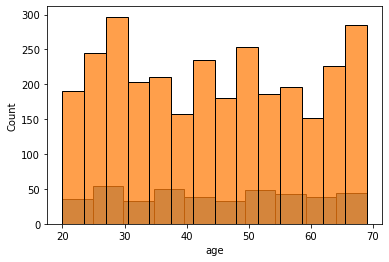

In [16]:
sns.histplot(df.query('premium == True').age)
sns.histplot(df.query('premium == False').age)

,success,client
0,1,2791
1,2,43
2,3,1
3,40,1
4,41,9


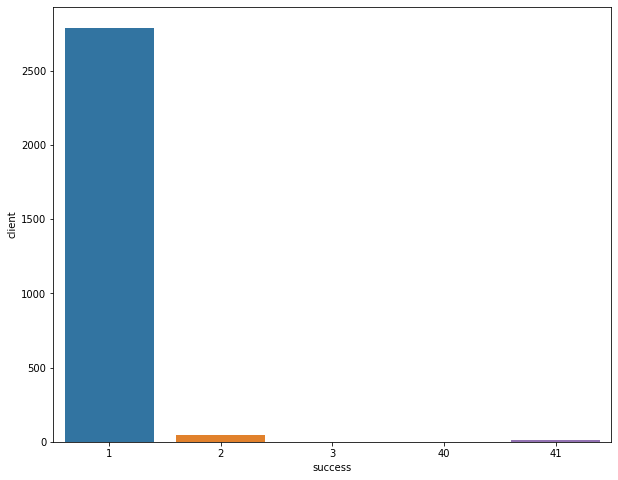

In [33]:
plt.figure(figsize=(10, 8))
clients_vs_success = df2 \
    .query('success == True') \
    .groupby('client', as_index = False) \
    .agg({'success':'sum'}) \
    .groupby('success', as_index = False) \
    .agg({'client':'count'})
sns.barplot(x = clients_vs_success['success'], y = clients_vs_success['client'])
clients_vs_success

<AxesSubplot:xlabel='age', ylabel='success'>

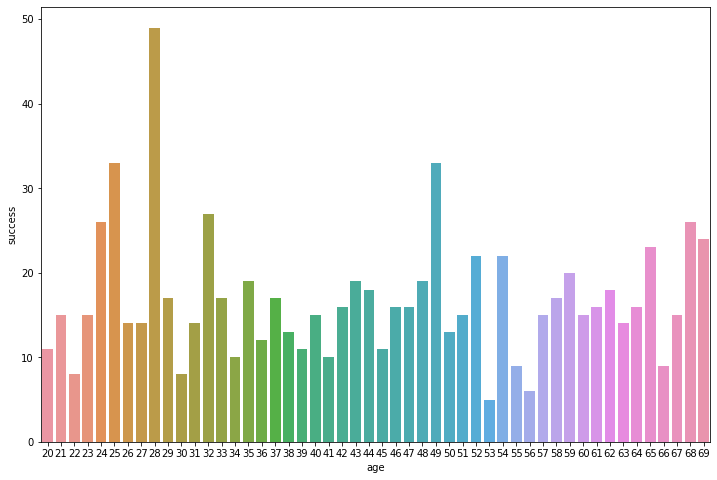

In [35]:
plt.figure(figsize=(12, 8))
age_success = df.query("platform == 'computer'") \
    .groupby('age', as_index = False) \
    .agg({'success':'sum'})
sns.barplot(x = age_success['age'], y = age_success['success'])